In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])
data

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [4]:
data.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [5]:
data.shape

(10000, 9)

In [6]:
data.size

90000

In [7]:
data.isnull().mean()*100

Date              0.0
Location          0.0
Country           0.0
Temperature       0.0
CO2 Emissions     0.0
Sea Level Rise    0.0
Precipitation     0.0
Humidity          0.0
Wind Speed        0.0
dtype: float64

In [8]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [9]:
data.sort_values(by='Date',inplace=True)

## extracting the date

In [10]:
data["year"]=data.Date.dt.year
data["month"]=data.Date.dt.month
data["Day"]=data.Date.dt.day
data["hour"]=data.Date.dt.hour
data["second"]=data.Date.dt.second
data["minute"]=data.Date.dt.minute

In [11]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,Day,hour,second,minute
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,0,0,0
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20,43,9
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16,26,19
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12,9,29
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,8,53,38


In [12]:
data.drop(columns='Date', inplace=True)

In [13]:
data.rename(columns={"Wind Speed":"WindSpeed"},inplace=True)
data.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,0,0,0
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20,43,9
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16,26,19
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12,9,29
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,8,53,38


#### Country with the hisghest temperature

In [14]:
Country_high_temp = data[data.Temperature==data.Temperature.max()]
Country_high_temp

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
5601,Bradleyport,Niger,33.976956,370.009529,-1.173126,53.160033,47.798918,16.57178,2012,11,18,7,9,27


## country with the highest Humidity

In [15]:
Country_high_hum = data[data.Humidity==data.Humidity.max()]
Country_high_hum

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
2869,West Ashley,Finland,17.711044,486.118907,-0.639723,30.779914,99.959665,34.390077,2006,8,7,4,28,49


## country with lowest wind speed

In [16]:
Country_high_wind = data[data.WindSpeed==data.WindSpeed.min()]
Country_high_wind

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
8466,West Laura,Peru,18.738096,299.684576,-1.486774,75.465083,47.137238,0.001732,2019,6,22,3,44,37


## univariate analysis

### histplot

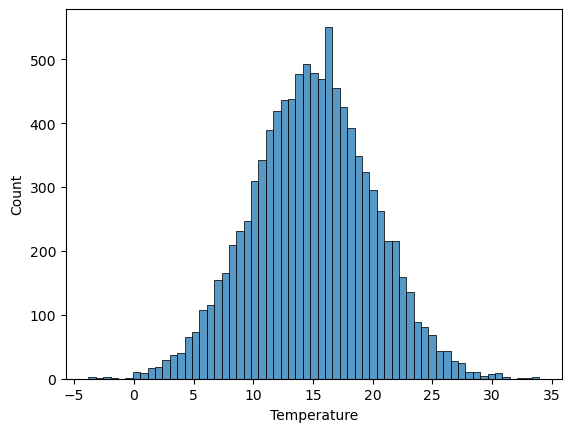

In [17]:
sns.histplot(data=data,x='Temperature')
plt.show()

## box plot

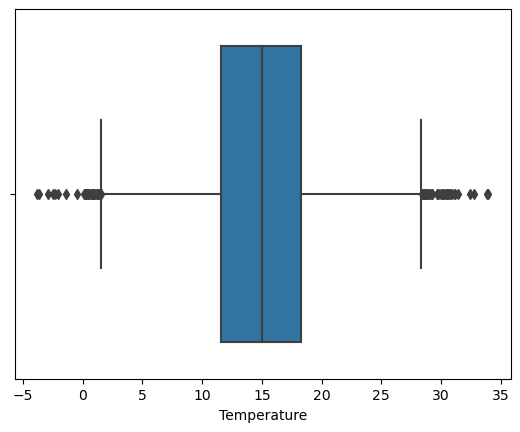

In [18]:
sns.boxplot(data=data,x='Temperature')
plt.show()

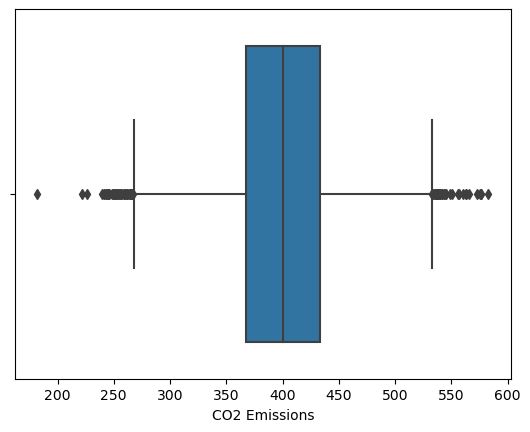

In [19]:
sns.boxplot(data=data,x='CO2 Emissions')
plt.show()

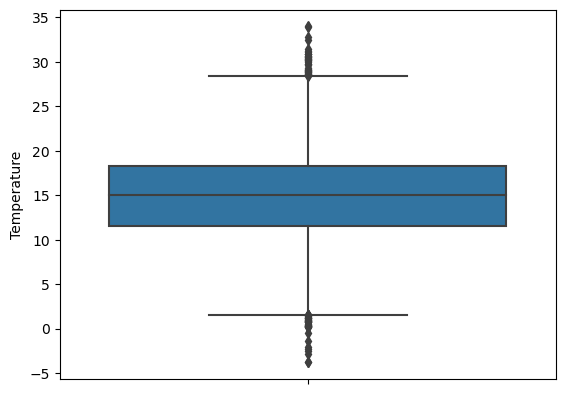

In [20]:
sns.boxplot(data=data,y='Temperature')
plt.show()

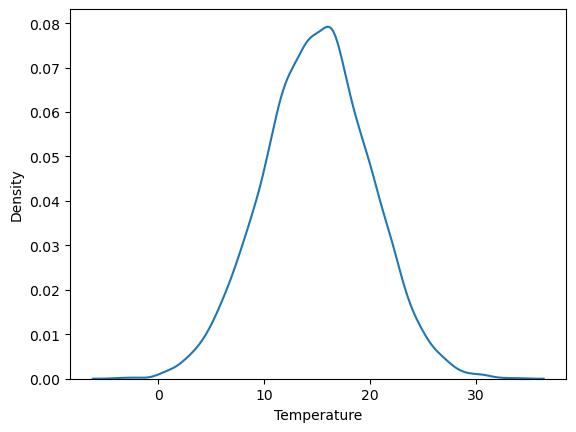

In [21]:
sns.kdeplot(data=data,x='Temperature')
plt.show()

## sub plot

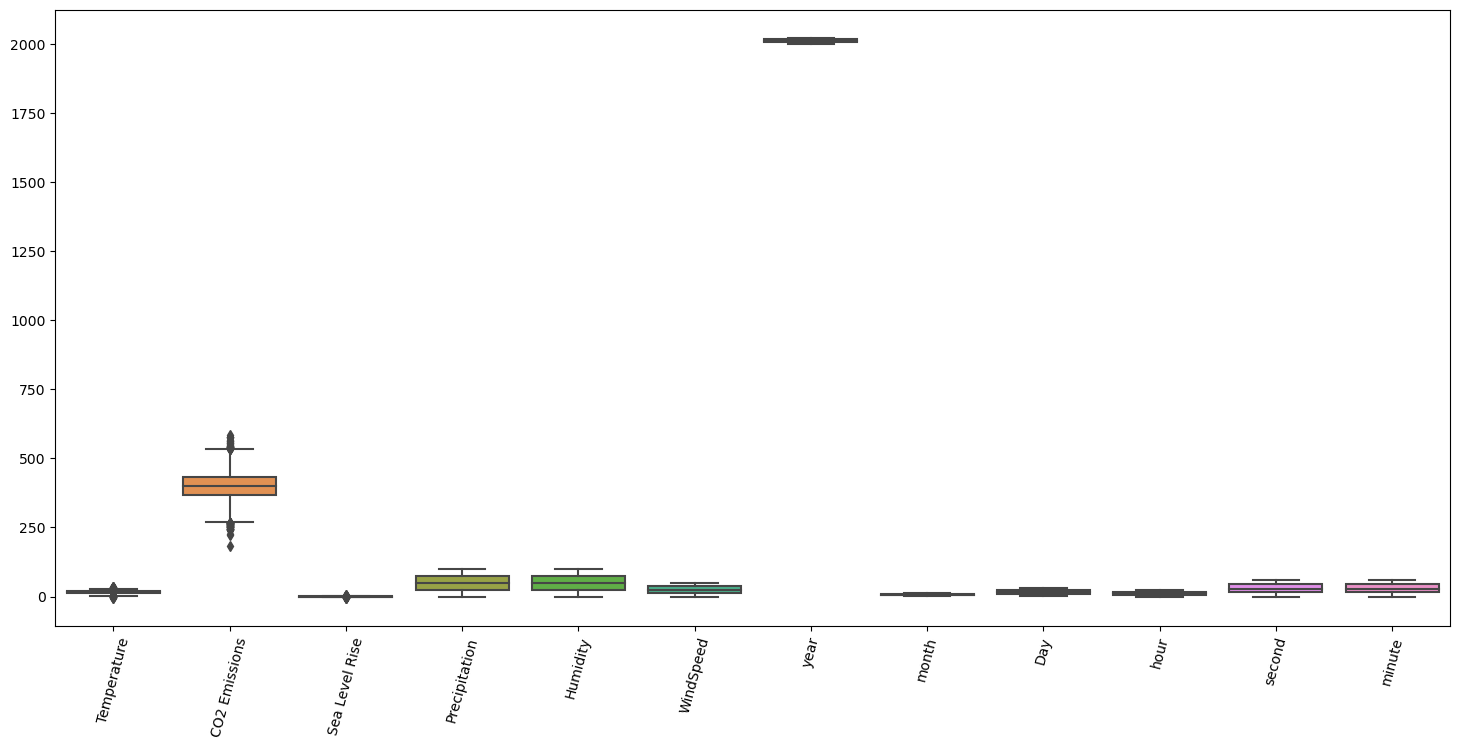

In [22]:
plt.figure(figsize=(18,8))
plt.xticks(rotation = 75)
sns.boxplot(data=data)
plt.show()

## subplot in matplotlib

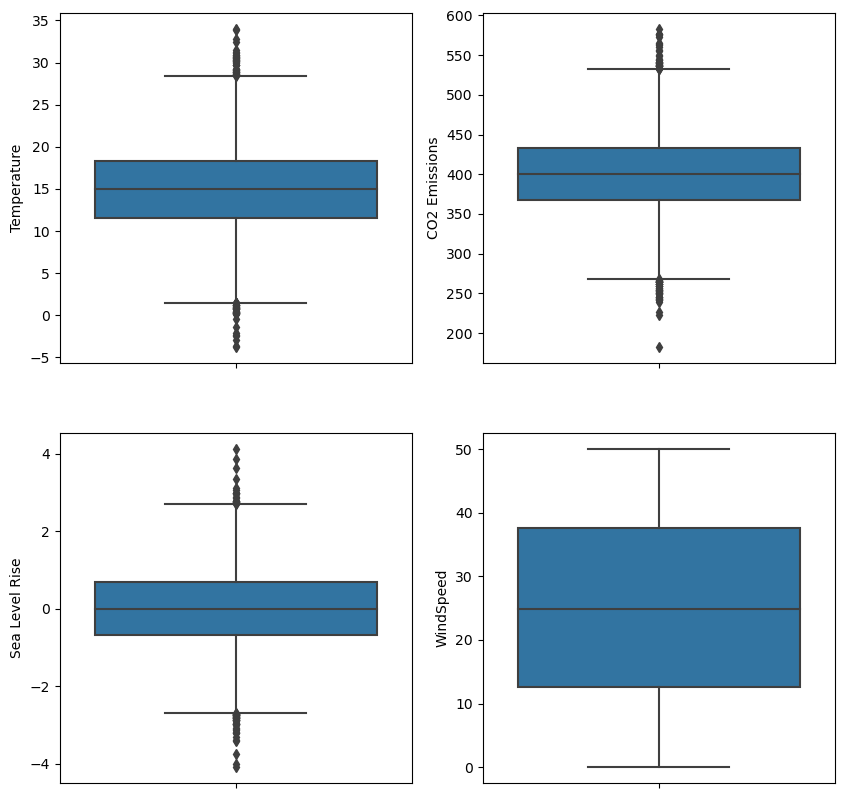

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,y='Temperature')
plt.subplot(2,2,2)
sns.boxplot(data=data,y='CO2 Emissions')
plt.subplot(2,2,3)
sns.boxplot(data=data,y='Sea Level Rise')
plt.subplot(2,2,4)
sns.boxplot(data=data,y='WindSpeed')
plt.show()

## line chart

In [24]:
data.Country.value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

In [25]:
congo = data[data.Country == 'Congo']

In [26]:
congo

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
46,West Micheleland,Congo,19.859165,316.213133,0.836719,90.846961,7.654420,13.056320,2000,2,8,15,9,27
212,Loriport,Congo,12.773925,417.000452,-1.371936,57.610696,72.101049,48.918807,2000,6,27,2,50,20
239,Lake Michael,Congo,3.497068,386.602196,-0.696530,38.487516,56.338173,47.253384,2000,7,19,18,18,43
430,West Faith,Congo,25.779951,495.573067,-0.438887,86.959785,28.579845,45.712980,2000,12,27,5,1,40
480,Lake Leahburgh,Congo,30.554231,338.373171,-0.464692,66.163779,5.846293,46.685396,2001,2,7,5,3,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,Port Deborahville,Congo,18.784635,424.170939,-1.044590,80.086602,94.568447,15.921829,2021,4,28,10,7,3
9523,Floydbury,Congo,18.945991,423.552242,-0.898348,34.022207,84.172461,29.550211,2021,11,26,2,49,52
9619,Lake Jessica,Congo,25.615691,376.023605,-0.484357,86.299702,10.690664,10.199765,2022,2,14,18,1,26
9891,New Donald,Congo,15.946857,400.622551,0.597057,36.613858,24.519511,4.347717,2022,10,1,6,8,30


In [27]:
Korea=data[data.Country=='Korea']
Korea

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,WindSpeed,year,month,Day,hour,second,minute
69,West Roberthaven,Korea,5.269831,413.862254,-1.198444,46.702809,29.621134,15.495185,2000,2,27,23,44,10
142,Lake Jacquelineton,Korea,19.804427,325.785385,1.117522,88.069054,76.890113,42.389260,2000,4,29,7,22,0
203,New Scottchester,Korea,15.686522,437.668021,-0.281736,11.405608,40.070034,12.763717,2000,6,19,12,21,53
269,New Meganport,Korea,13.985536,412.913175,-0.186333,22.164632,52.735063,1.571454,2000,8,13,23,56,34
831,Sharpmouth,Korea,6.335569,493.230237,-0.502311,80.566016,80.062493,42.893707,2001,11,29,2,7,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9079,South Laura,Korea,12.147583,362.947255,0.448722,51.353072,14.590204,3.247516,2020,11,18,2,42,56
9496,Myershaven,Korea,17.746987,415.010448,1.350369,34.437171,79.188936,8.518121,2021,11,3,10,21,30
9512,Port Amanda,Korea,13.567268,409.272797,-1.050709,26.250014,72.174617,43.141593,2021,11,16,21,53,5
9717,Reevesburgh,Korea,11.512881,481.159566,1.735910,33.038546,2.494816,31.218988,2022,5,8,2,41,18


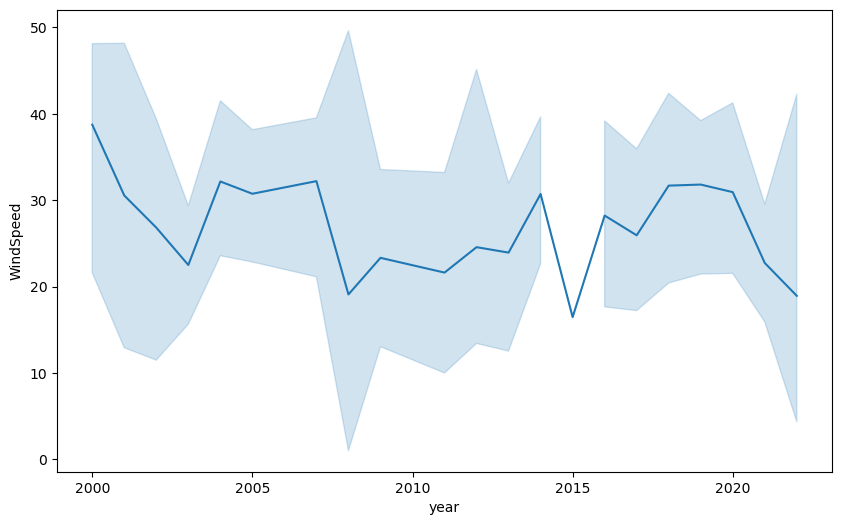

In [28]:
plt.figure(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('WindSpeed')
sns.lineplot(data=congo,x='year',y='WindSpeed')
plt.show()

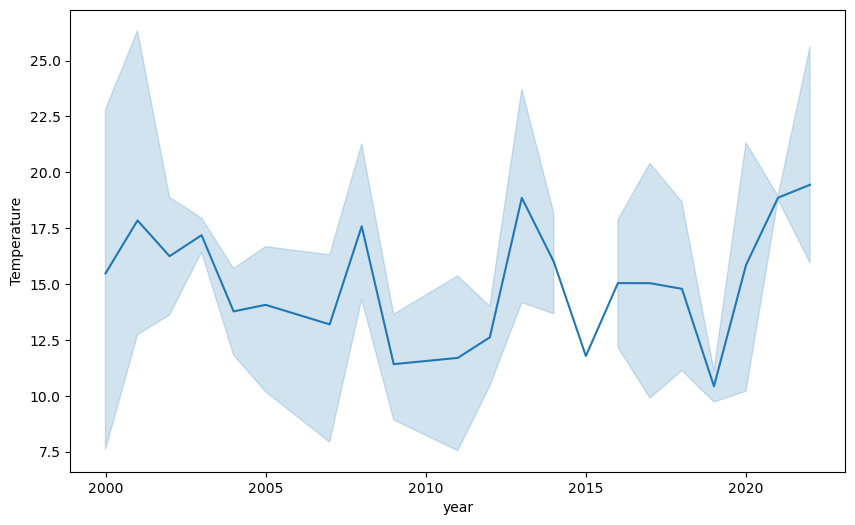

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('Temperature')
sns.lineplot(data=congo,x='year',y='Temperature')
plt.show()

## reg plot

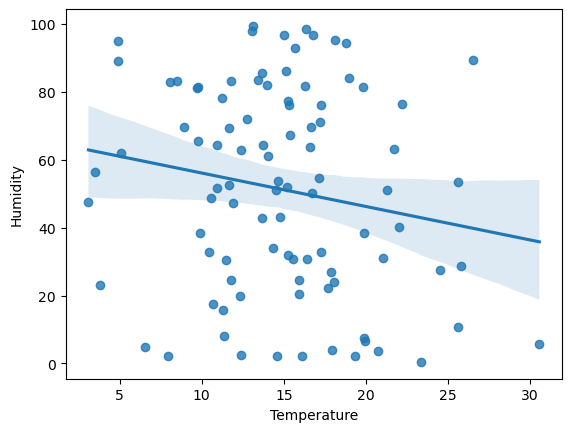

In [30]:
sns.regplot(data = congo, x = 'Temperature', y= 'Humidity')
plt.show()

## KDE PLOT

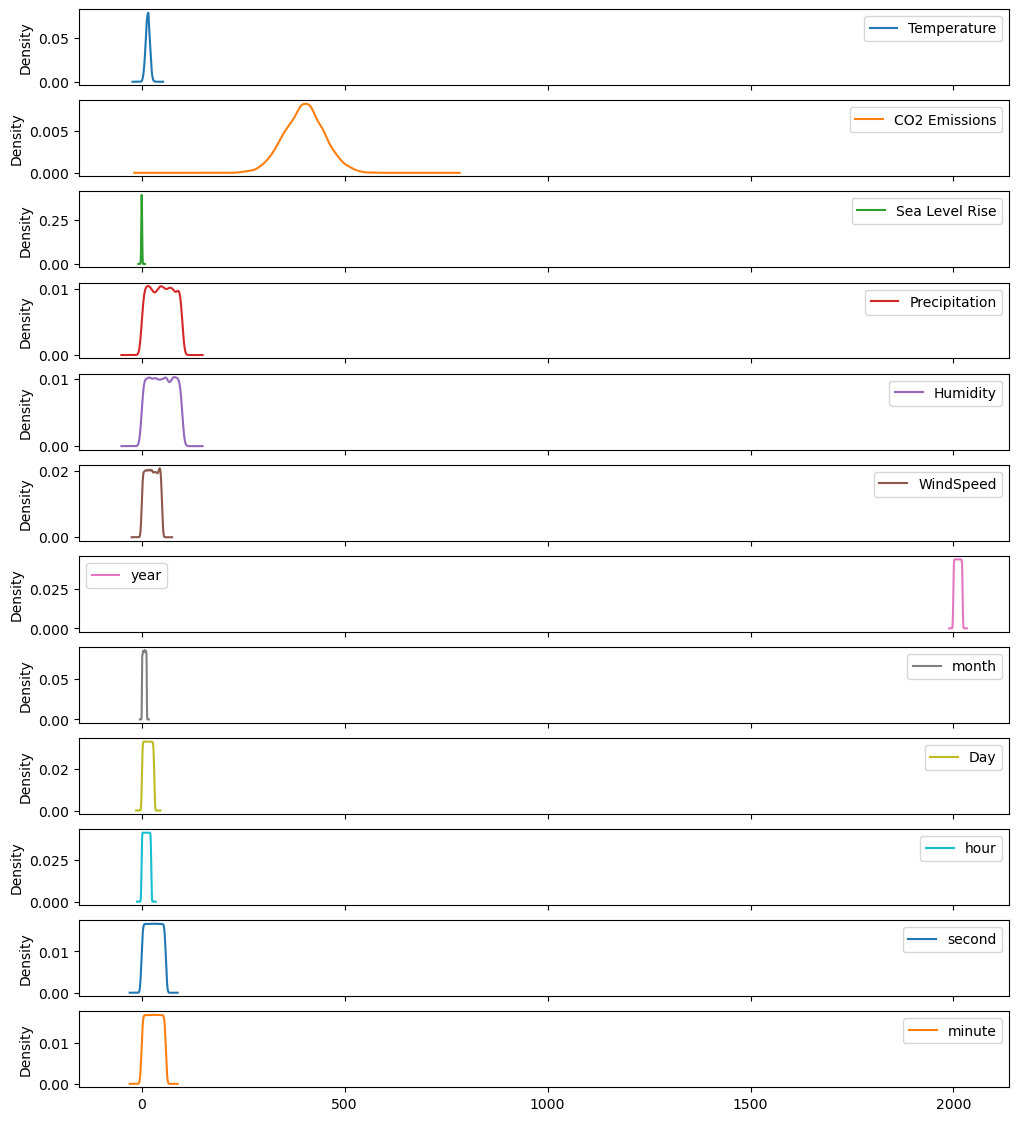

In [31]:
data.plot.kde(figsize=(12,14),subplots=True);

## relplot

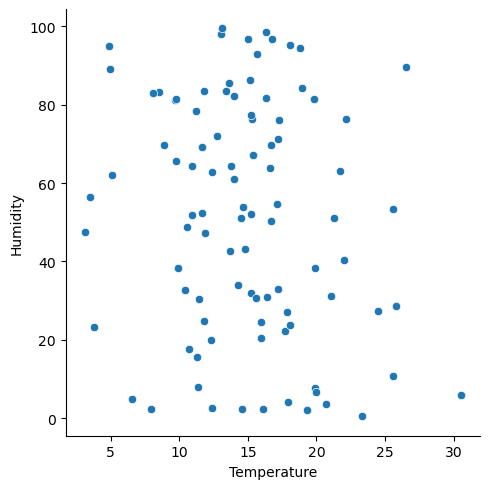

In [32]:
sns.relplot(data = congo, x = 'Temperature', y= 'Humidity')
plt.show()

## boxen plot

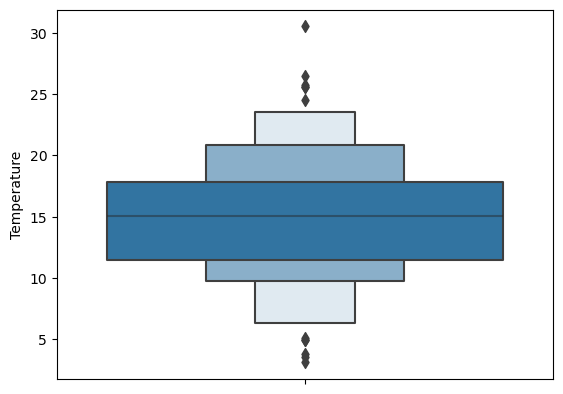

In [33]:
sns.boxenplot(data=congo, y='Temperature')
plt.show()

## violin plot

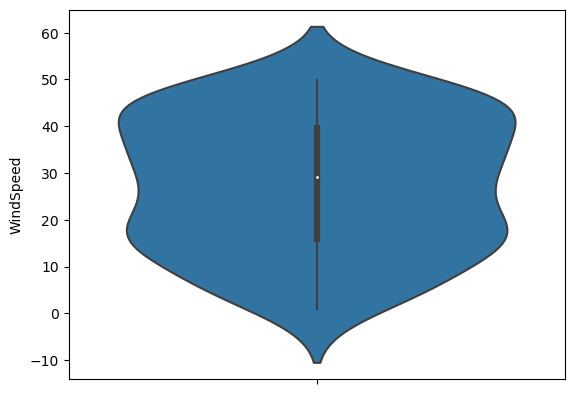

In [34]:
sns.violinplot(data=congo, y='WindSpeed')
plt.show()

## joint plot

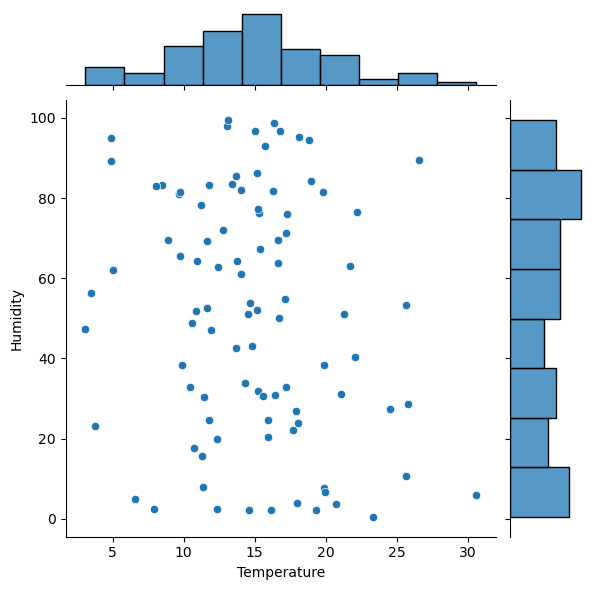

In [35]:
sns.jointplot(data=congo, x='Temperature',y='Humidity')
plt.show()

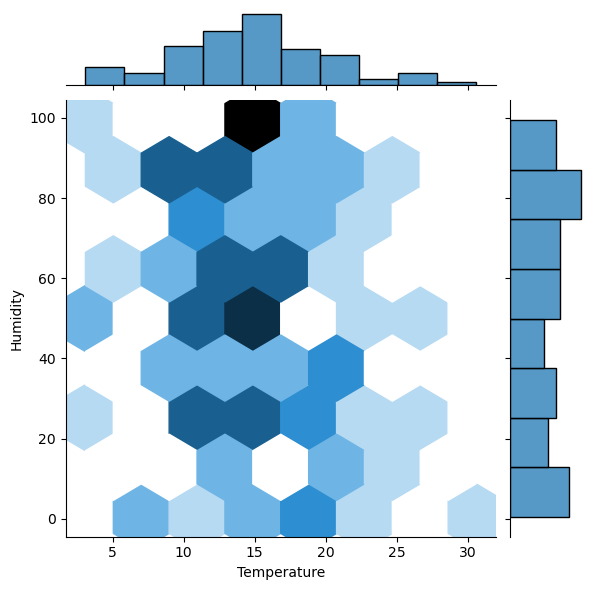

In [36]:
sns.jointplot(data=congo, x='Temperature',y='Humidity',kind='hex')
plt.show()

## pair plot

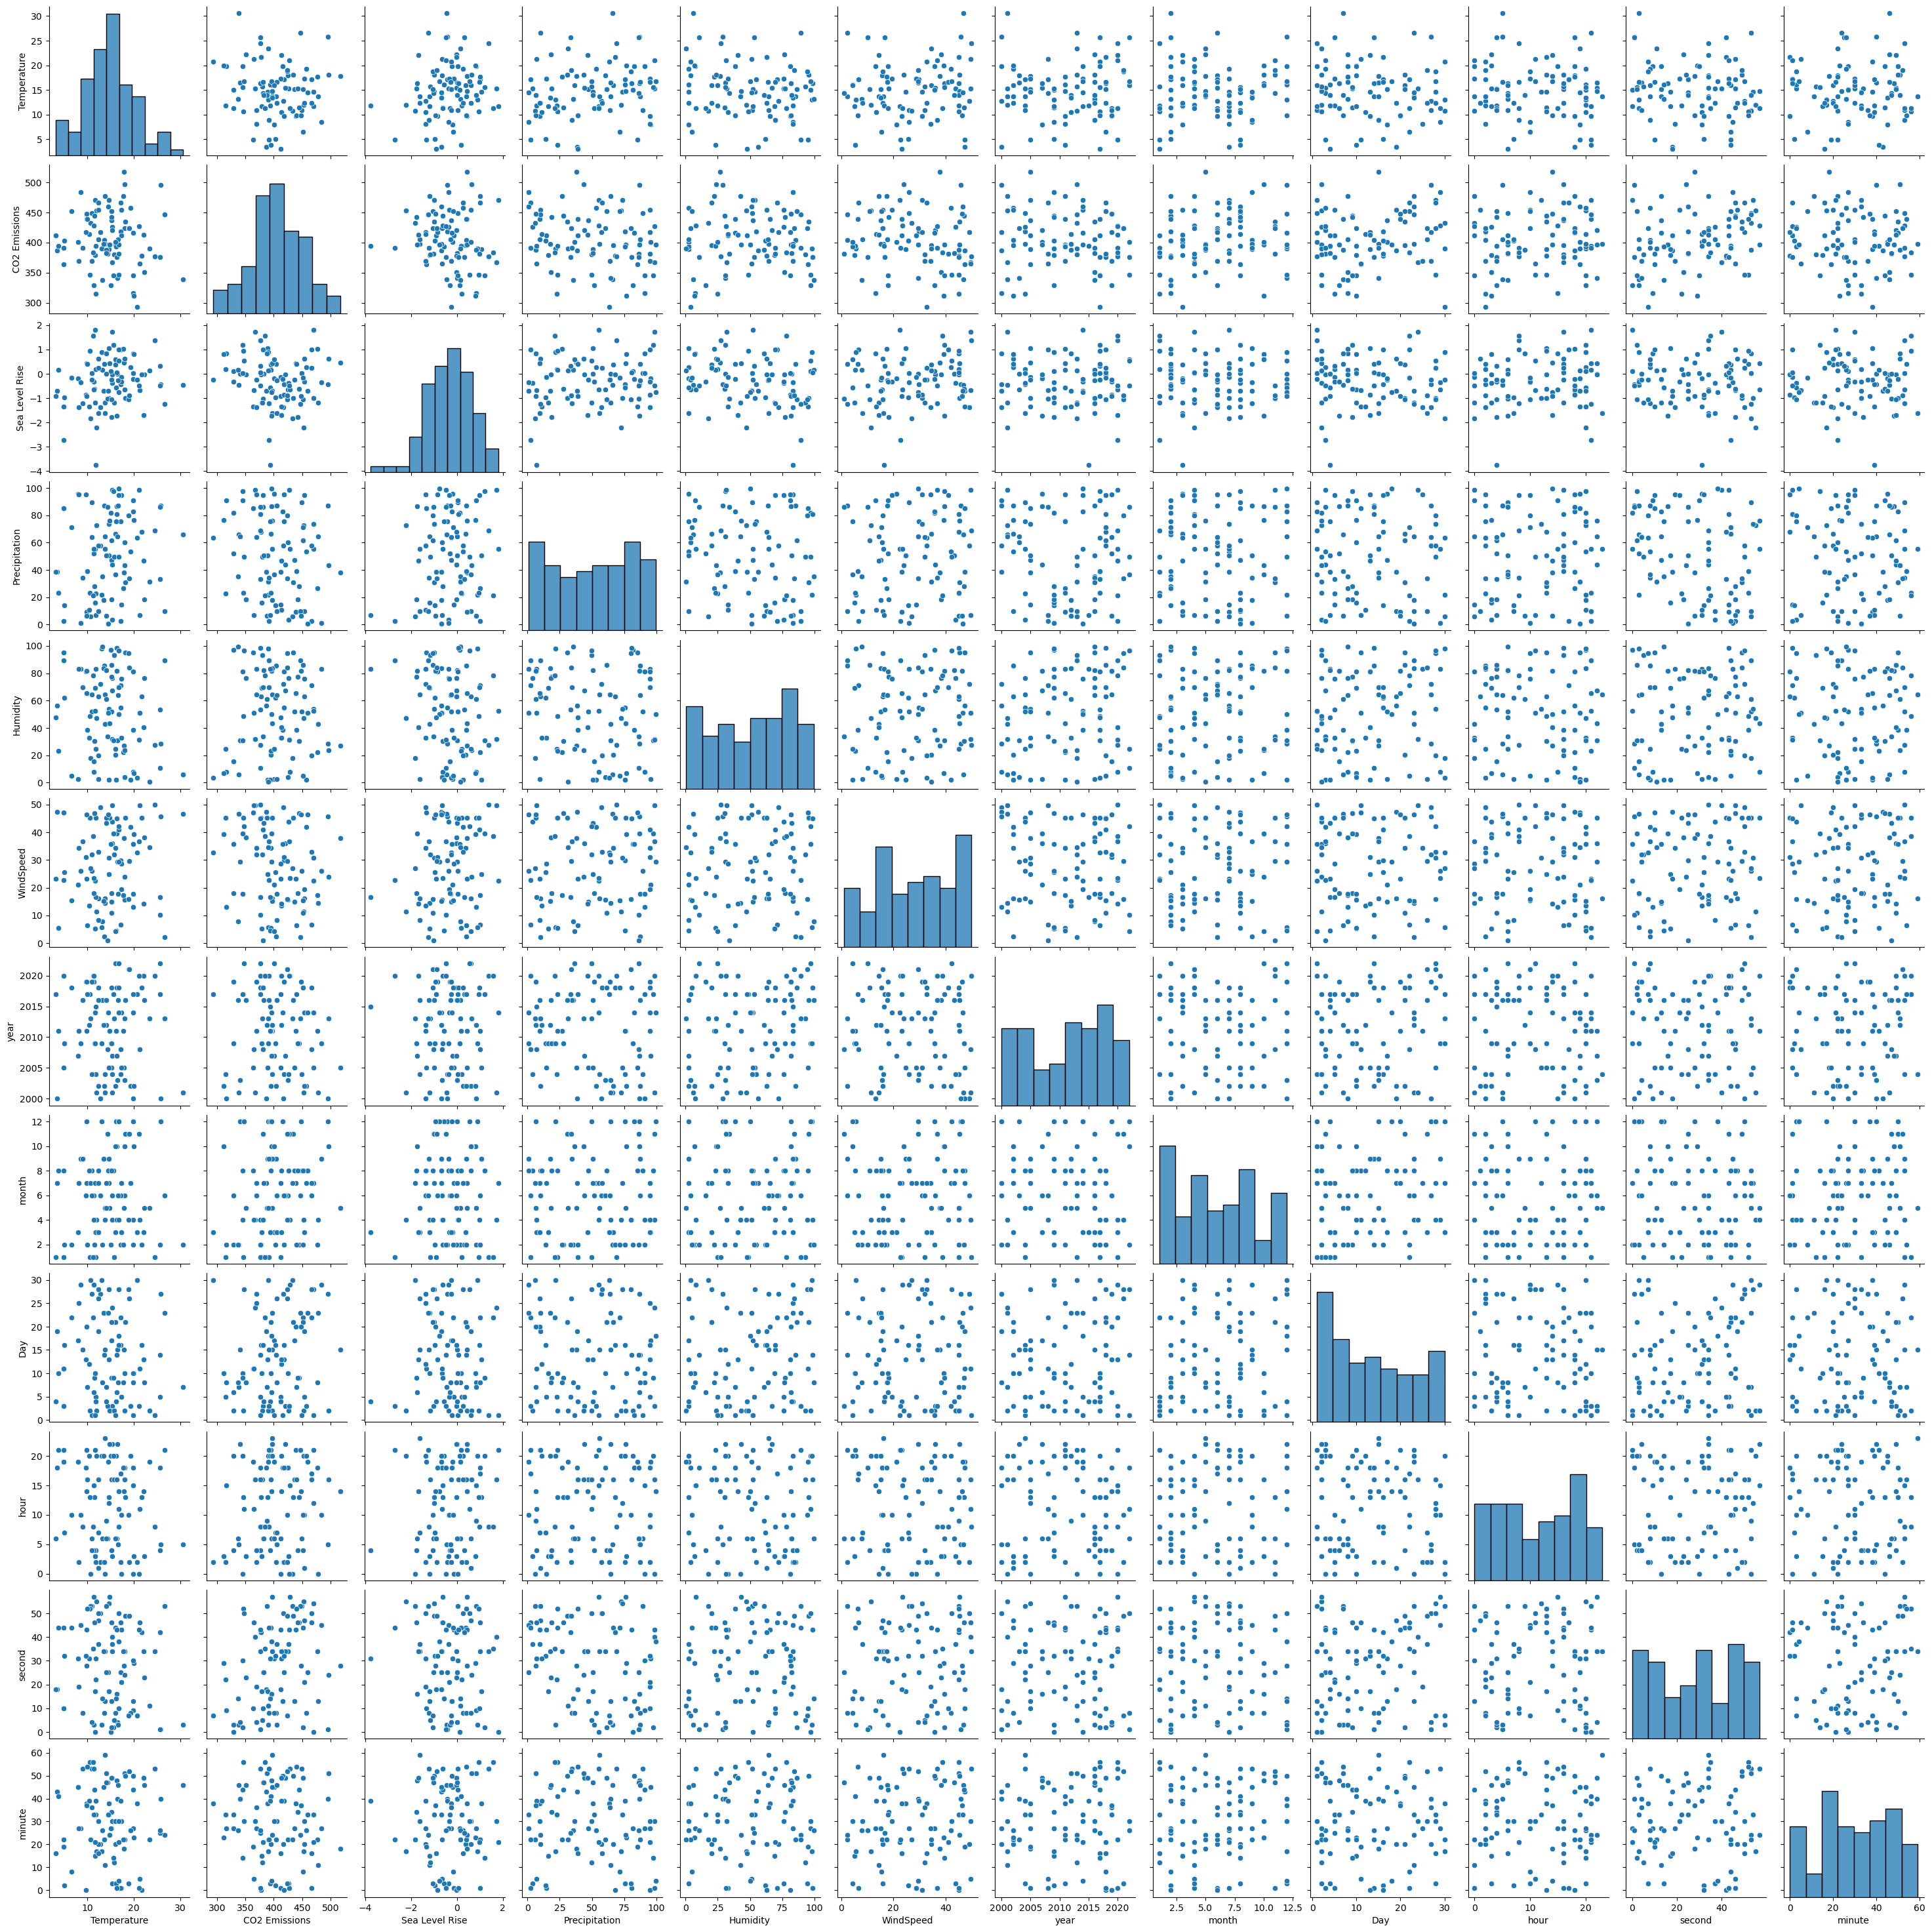

In [37]:
sns.pairplot(data=congo)
plt.show()

## HEATMAP

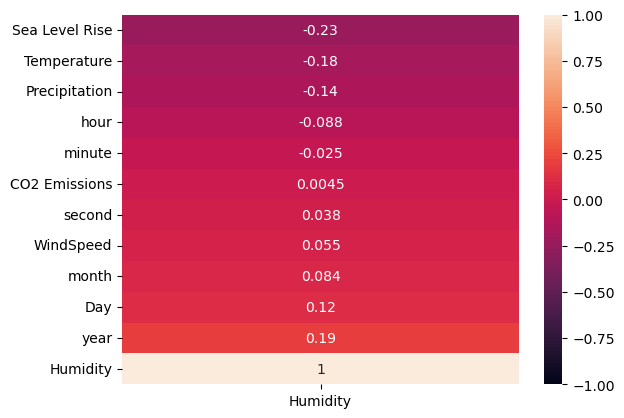

In [38]:
sns.heatmap(congo.corr()[['Humidity']].sort_values(by='Humidity'), vmax=1, vmin=-1, annot=True);

## horizontal bar chart

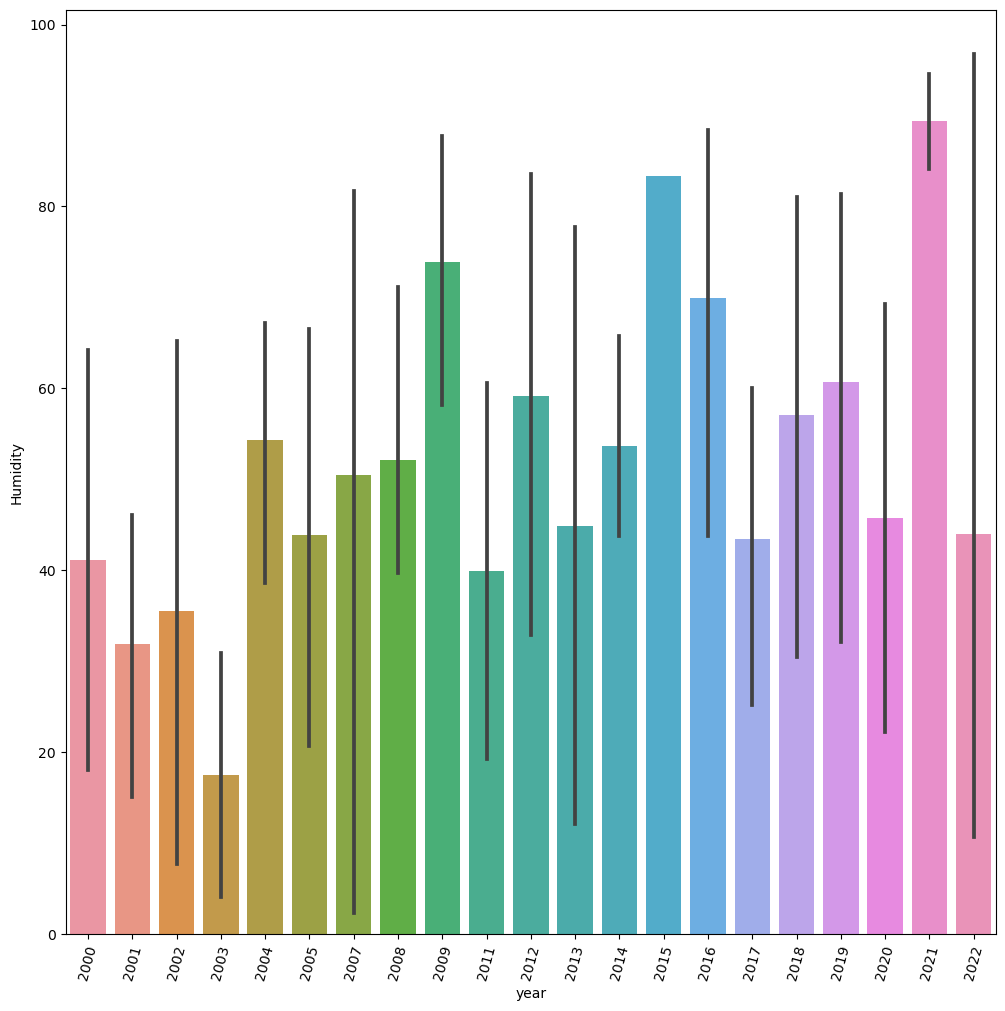

In [39]:
plt.figure(figsize=(12,12))
plt.xticks(rotation = 75)
sns.barplot(data=congo, x='year', y='Humidity')
plt.show()

## vertical bar plot

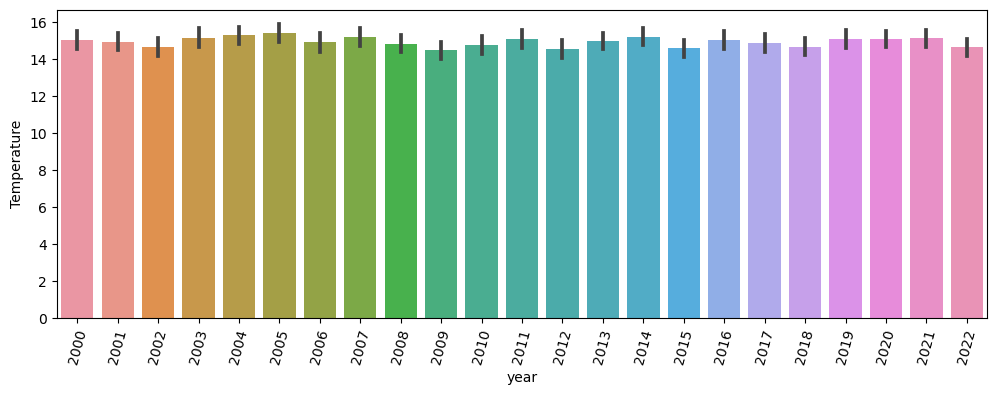

In [40]:
plt.figure(figsize=(12,4))
plt.xticks(rotation = 75)
sns.barplot(data=data, x='year', y='Temperature')
plt.show()

## scatter plot

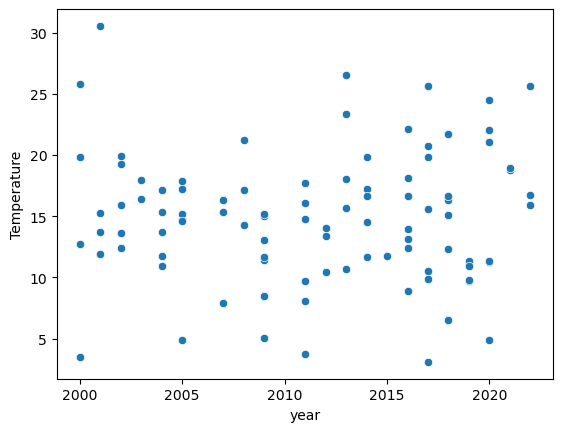

In [41]:
sns.scatterplot(data=congo,x='year',y='Temperature')
plt.show()